In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Heart_attack_risk_prediction.csv')

In [3]:
df.head()

,Patient_ID,Gender,Age,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Glucose_Levels,BMI_Values,Smoking_Habits,Heart_Attack
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Patient_ID        43400 non-null  int64  
 1   Gender            43400 non-null  object 
 2   Age               43400 non-null  float64
 3   HyperTension      43400 non-null  int64  
 4   Heart_Disease     43400 non-null  int64  
 5   Is_Married        43400 non-null  object 
 6   Employment_Type   43400 non-null  object 
 7   Residential_type  43400 non-null  object 
 8   Glucose_Levels    43400 non-null  float64
 9   BMI_Values        41938 non-null  float64
 10  Smoking_Habits    30108 non-null  object 
 11  Heart_Attack      43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [5]:
df['HyperTension']=df.HyperTension.astype(dtype='object')
df['Heart_Disease']=df.Heart_Disease.astype(dtype='object')

In [6]:
df.describe()

,Patient_ID,Age,Glucose_Levels,BMI_Values,Heart_Attack
count,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,104.482750,28.605038,0.018041
std,21072.134879,22.519649,43.111751,7.770020,0.133103
min,1.000000,0.080000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,291.050000,97.600000,1.000000


In [7]:
df.select_dtypes(include="object").describe()

,Gender,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Smoking_Habits
count,43400,43400,43400,43400,43400,43400,30108
unique,3,2,2,2,5,2,3
top,Female,0,0,Yes,Private,Urban,never smoked
freq,25665,39339,41338,27938,24834,21756,16053


In [8]:
df.Heart_Attack.value_counts()

Heart_Attack
0    42617
1      783
Name: count, dtype: int64

In [9]:
df.drop(columns='Patient_ID', axis=1, inplace=True)

In [10]:
df.isnull().sum()

Gender                  0
Age                     0
HyperTension            0
Heart_Disease           0
Is_Married              0
Employment_Type         0
Residential_type        0
Glucose_Levels          0
BMI_Values           1462
Smoking_Habits      13292
Heart_Attack            0
dtype: int64

In [11]:
df.BMI_Values.skew()

0.8987282500249906

In [12]:
df.BMI_Values.fillna(df.BMI_Values.median(), inplace=True)

In [13]:
df.Smoking_Habits.value_counts()

Smoking_Habits
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

In [14]:
import numpy as np

In [15]:
#### Analysing Smoking habits clm

In [16]:
df[(df.Age<=22)][['Smoking_Habits']].value_counts()

Smoking_Habits 
never smoked       2369
smokes              439
formerly smoked     420
Name: count, dtype: int64

In [17]:
df[(df.Age>22) & (df.Age<50)][['Smoking_Habits']].value_counts()

Smoking_Habits 
never smoked       6787
smokes             3263
formerly smoked    2332
Name: count, dtype: int64

In [18]:
df[(df.Age>=50)][['Smoking_Habits']].value_counts()

Smoking_Habits 
never smoked       6897
formerly smoked    4741
smokes             2860
Name: count, dtype: int64

In [19]:
df[(df.HyperTension==1)][['Smoking_Habits']].value_counts()

Smoking_Habits 
never smoked       1748
formerly smoked    1044
smokes              736
Name: count, dtype: int64

In [20]:
df[(df.HyperTension==0)][['Smoking_Habits']].value_counts()

Smoking_Habits 
never smoked       14305
formerly smoked     6449
smokes              5826
Name: count, dtype: int64

In [21]:
# Conclusion ---> As analysing the Smoking_habits column there is no pattern difference
# Never smoked is higher 
# but if we replaced it with 13000 null values it may affect our model 
# Going with bfill / ffill

In [22]:
# len(df)-df.Smoking_Habits.isnull().sum() ----> total number of null value 'Manual'
# 10  Smoking_Habits    30108 non-null  object 

In [23]:
(df.Smoking_Habits.value_counts()/30108)*100 # ---->Percentage of catgories in Smoking habits without null

Smoking_Habits
never smoked       53.318055
formerly smoked    24.887073
smokes             21.794872
Name: count, dtype: float64

In [24]:
(df.Smoking_Habits.bfill().value_counts()/len(df))*100   #   ---> After replacing null

Smoking_Habits
never smoked       53.40553
formerly smoked    24.83871
smokes             21.75576
Name: count, dtype: float64

In [25]:
df.Smoking_Habits.bfill().isnull().sum()

0

In [26]:
# df.Smoking_Habits.mode()

In [27]:
# df.Smoking_Habits.fillna(df.Smoking_Habits.mode(), inplace=True)

In [28]:
df.Gender.value_counts()

Gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64

In [29]:
df[(df.Gender=='Male')][['Smoking_Habits']].value_counts()

Smoking_Habits 
never smoked       5483
formerly smoked    3370
smokes             2880
Name: count, dtype: int64

In [30]:
df[(df.Gender=='Female')][['Smoking_Habits']].value_counts()

Smoking_Habits 
never smoked       10568
formerly smoked     4117
smokes              3681
Name: count, dtype: int64

In [31]:
# After using Bfill the overall data set is not affected and null is 0

In [32]:
df.Smoking_Habits=df.Smoking_Habits.bfill()

In [33]:
df.isnull().sum()

Gender              0
Age                 0
HyperTension        0
Heart_Disease       0
Is_Married          0
Employment_Type     0
Residential_type    0
Glucose_Levels      0
BMI_Values          0
Smoking_Habits      0
Heart_Attack        0
dtype: int64

In [34]:
df.head(2)

,Gender,Age,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Glucose_Levels,BMI_Values,Smoking_Habits,Heart_Attack
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0


In [35]:
df.corr(numeric_only=True)

,Age,Glucose_Levels,BMI_Values,Heart_Attack
Age,1.000000,0.237627,0.350231,0.156049
Glucose_Levels,0.237627,1.000000,0.181899,0.078917
BMI_Values,0.350231,0.181899,1.000000,0.016073
Heart_Attack,0.156049,0.078917,0.016073,1.000000


In [36]:
# No variable influences the Target

In [37]:
import seaborn as sns

In [38]:
import matplotlib.pyplot as plt

<Axes: >

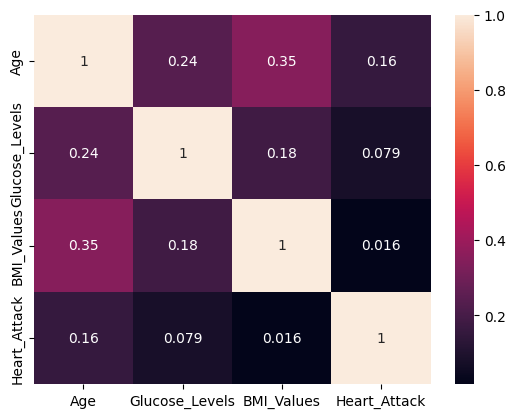

In [39]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: xlabel='Smoking_Habits', ylabel='count'>

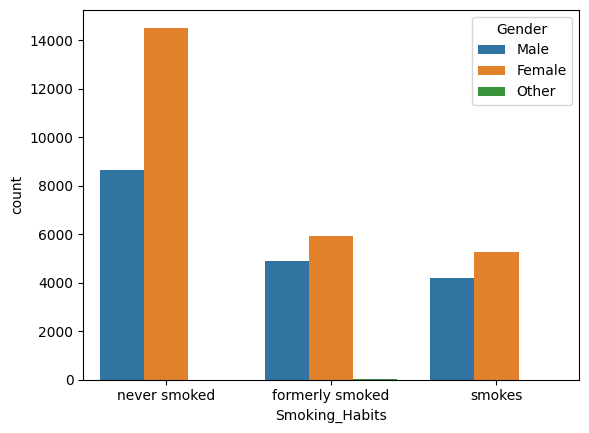

In [40]:
sns.countplot(df, x='Smoking_Habits', hue='Gender')

<Figure size 2000x1200 with 0 Axes>

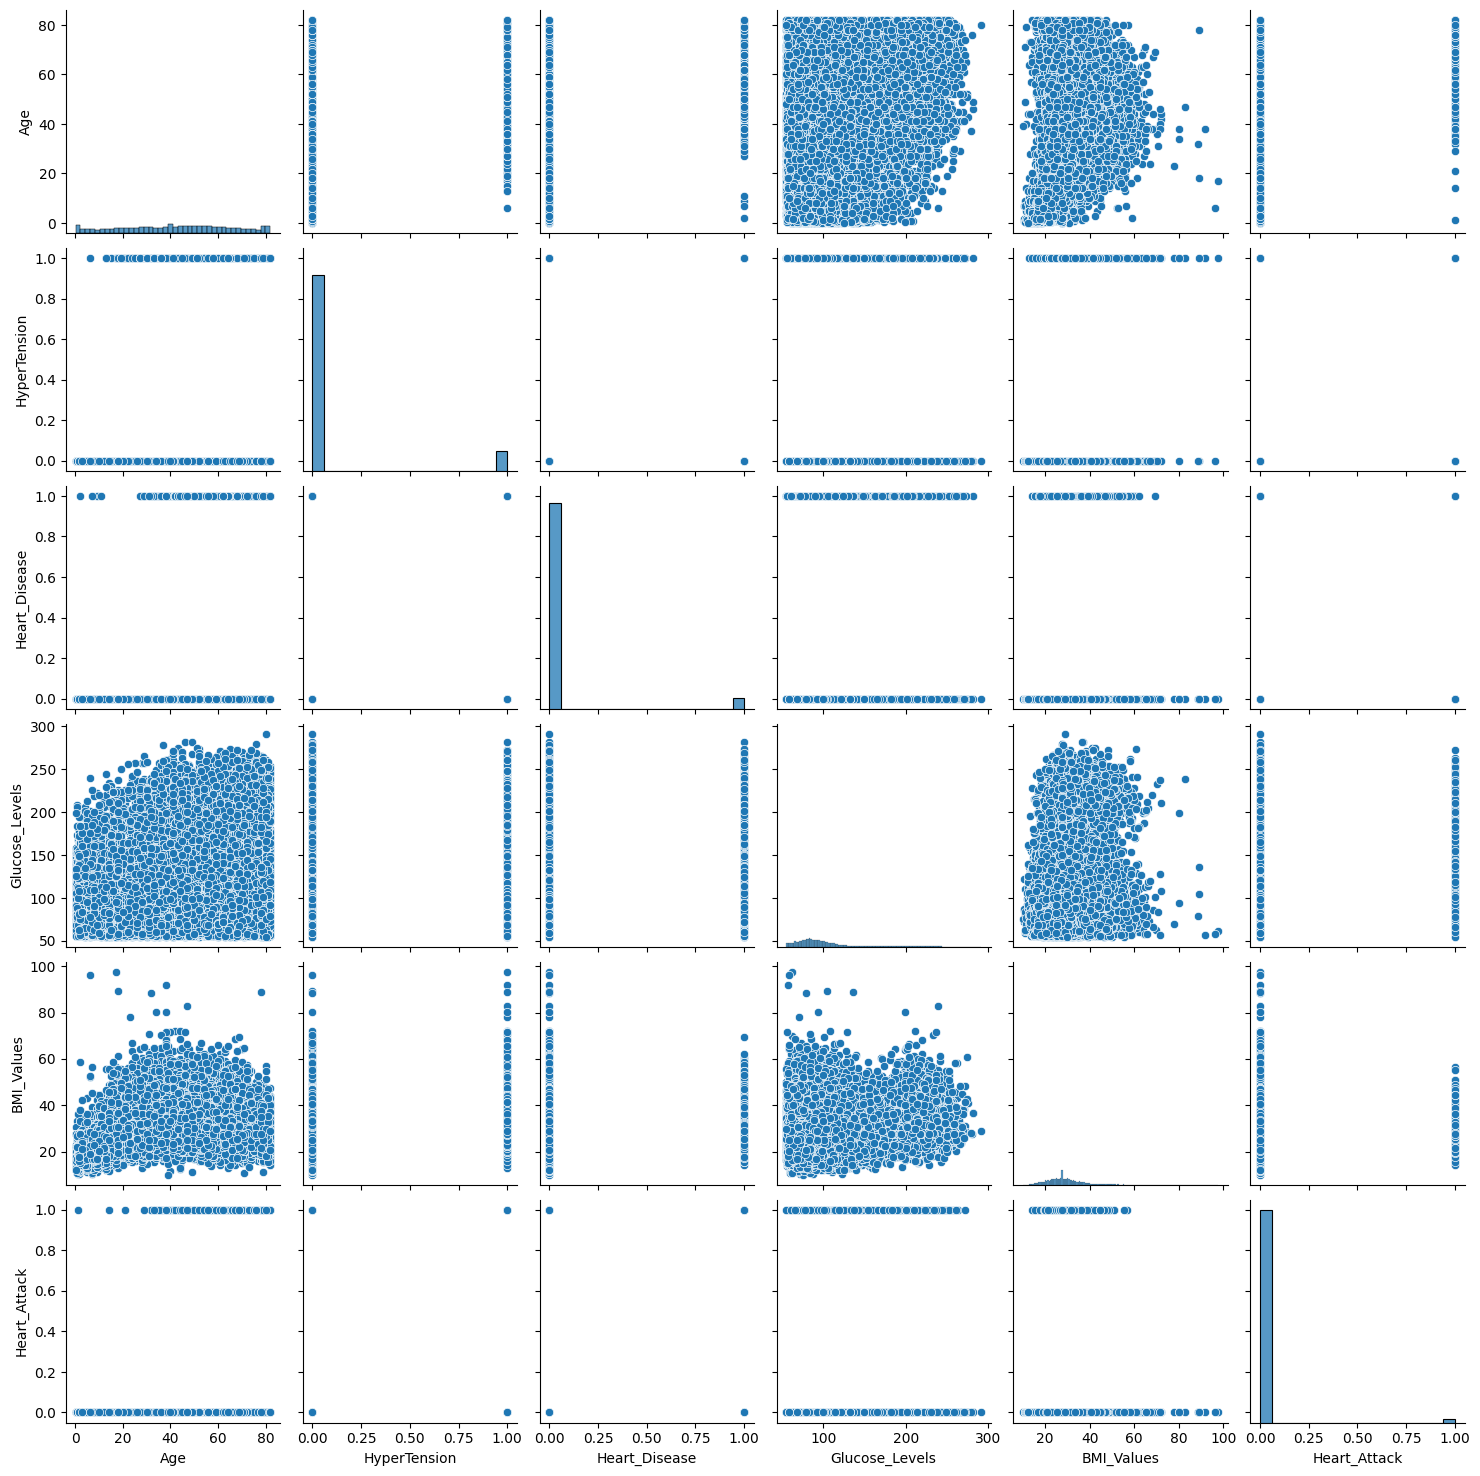

In [41]:
plt.figure(figsize=(20,12))
sns.pairplot(df)
plt.show()

<Axes: xlabel='Heart_Disease', ylabel='count'>

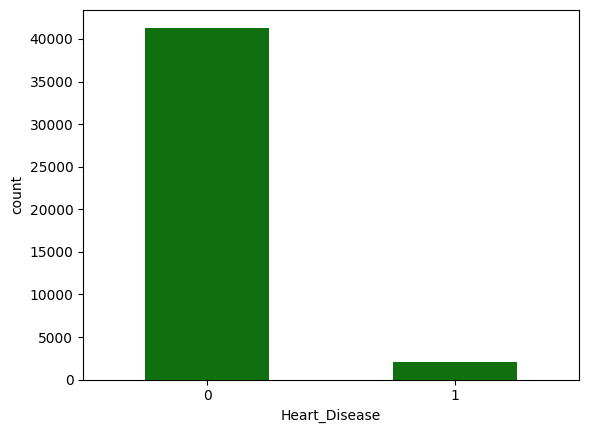

In [42]:
sns.countplot(df, x='Heart_Disease', width=0.5,color='Green')

<Axes: xlabel='Is_Married', ylabel='count'>

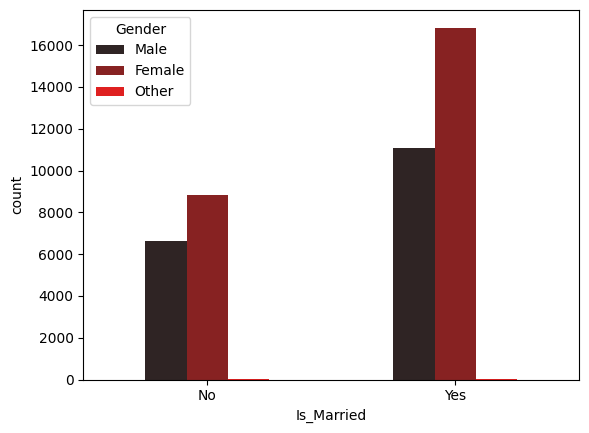

In [43]:
sns.countplot(df, x='Is_Married', width=0.5, palette='dark:red', hue='Gender')

<Axes: xlabel='Residential_type', ylabel='count'>

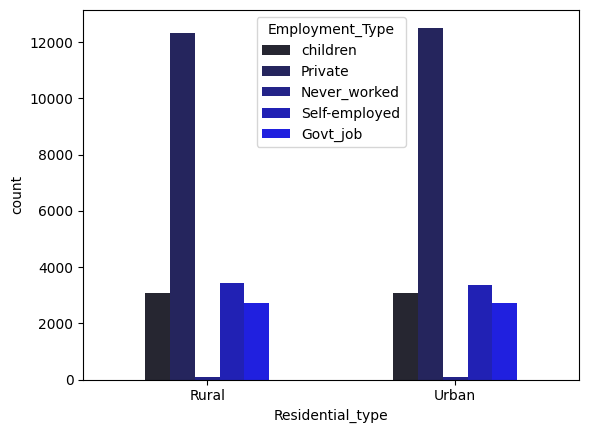

In [44]:
sns.countplot(df, x='Residential_type', width=0.5, palette='dark:blue', hue='Employment_Type')

<Axes: xlabel='Age', ylabel='BMI_Values'>

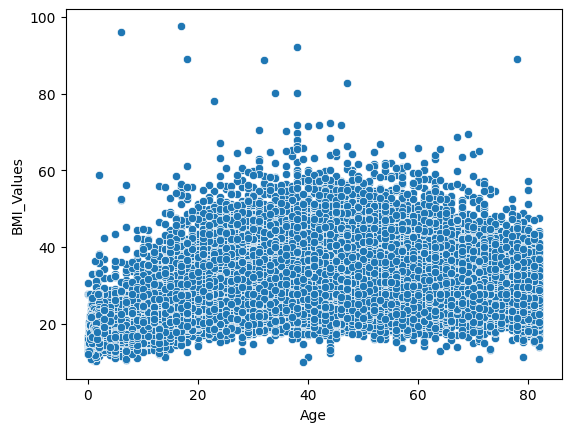

In [45]:
sns.scatterplot(df, x='Age', y="BMI_Values")

<Axes: xlabel='Employment_Type', ylabel='count'>

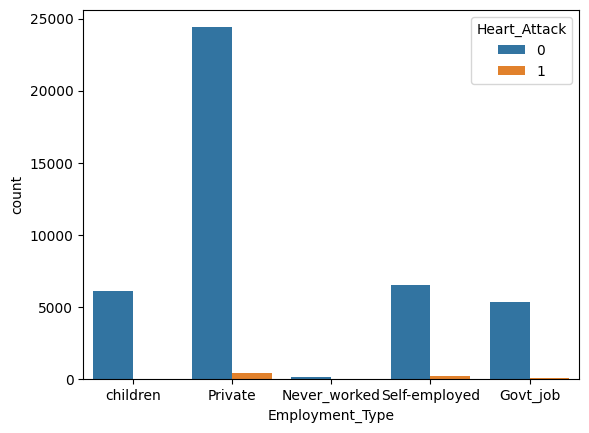

In [46]:
sns.countplot(df, x='Employment_Type', hue='Heart_Attack')

<Axes: xlabel='Glucose_Levels', ylabel='BMI_Values'>

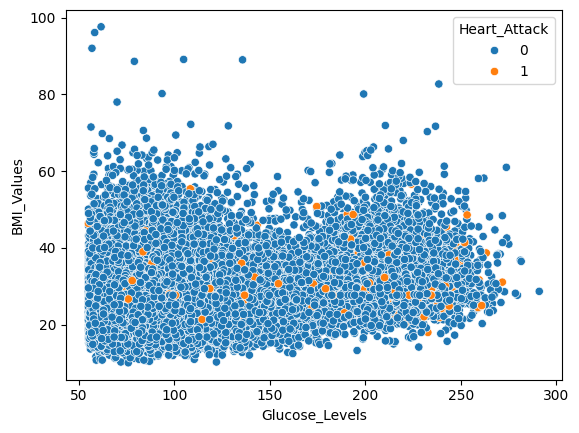

In [47]:
sns.scatterplot(df, x='Glucose_Levels', y='BMI_Values', hue='Heart_Attack')

In [48]:
df.head(2)

,Gender,Age,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Glucose_Levels,BMI_Values,Smoking_Habits,Heart_Attack
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0


In [49]:
df_num = df.select_dtypes(include=['int64', 'float64'])

In [50]:
df_num.head()

,Age,Glucose_Levels,BMI_Values,Heart_Attack
0,3.0,95.12,18.0,0
1,58.0,87.96,39.2,0
2,8.0,110.89,17.6,0
3,70.0,69.04,35.9,0
4,14.0,161.28,19.1,0


In [51]:
df_str = df.select_dtypes(include=['object'])
df_str.head()

,Gender,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Smoking_Habits
0,Male,0,0,No,children,Rural,never smoked
1,Male,1,0,Yes,Private,Urban,never smoked
2,Female,0,0,No,Private,Urban,formerly smoked
3,Female,0,0,Yes,Private,Rural,formerly smoked
4,Male,0,0,No,Never_worked,Rural,formerly smoked


In [52]:
dummy = pd.get_dummies(df_str, drop_first=True, dtype=int)
dummy.head()

,Gender_Male,Gender_Other,HyperTension_1,Heart_Disease_1,Is_Married_Yes,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Residential_type_Urban,Smoking_Habits_never smoked,Smoking_Habits_smokes
0,1,0,0,0,0,0,0,0,1,0,1,0
1,1,0,1,0,1,0,1,0,0,1,1,0
2,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,1,0,1,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0


In [53]:
df_pre = pd.concat([df_num,dummy],axis=1)
df_pre.head(2)

,Age,Glucose_Levels,BMI_Values,Heart_Attack,Gender_Male,Gender_Other,HyperTension_1,Heart_Disease_1,Is_Married_Yes,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Residential_type_Urban,Smoking_Habits_never smoked,Smoking_Habits_smokes
0,3.0,95.12,18.0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,58.0,87.96,39.2,0,1,0,1,0,1,0,1,0,0,1,1,0


In [54]:
x = df_pre.drop(columns='Heart_Attack')
x.shape

(43400, 15)

In [55]:
y = df_pre[['Heart_Attack']]
y.shape

(43400, 1)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42)

In [57]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)

In [58]:
logreg1=logreg.fit(X_train, y_train)

In [59]:
y_train_pred = logreg1.predict(X_train)
y_test_pred = logreg1.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[29831     0]
 [  548     0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29831
           1       0.00      0.00      0.00       548

    accuracy                           0.98     30379
   macro avg       0.49      0.50      0.50     30379
weighted avg       0.96      0.98      0.97     30379



In [61]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[12785     0]
 [  235     0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12785
           1       0.00      0.00      0.00       235

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020



In [62]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_test_pred)
acc

0.9819508448540707

In [63]:
# ACCURACY SCORE :    0.9819508448540707
#                     0.9819508448540707
# before type casting hypertension and heart disease clmns.
# Replacing smoking with mode / bfill no changes to the model performance.

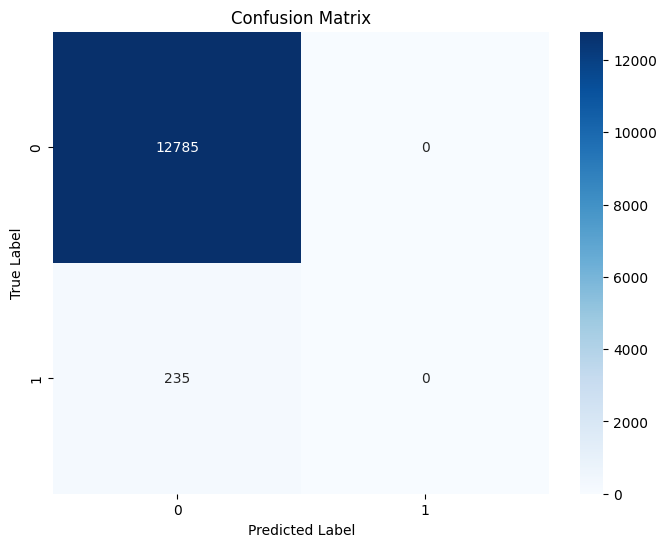

In [64]:
cm = confusion_matrix(y_test, y_test_pred)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [70]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
model = LogisticRegression(max_iter=5000)
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds,shuffle=True,random_state=42)
cv_score = cross_val_score(model,x,y,cv=skf)
print("Cross Validation Score:",cv_score)
print("Mean CV Score:",np.mean(cv_scores))

Cross Validation Score: [0.98202765 0.98202765 0.98191244 0.98191244 0.98191244]
Mean CV Score: 0.9819585253456221


In [ ]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=2)

for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]